In [1]:
import torch
import torch.nn as nn 
from torch.utils.data import Dataset, DataLoader,TensorDataset
import  torchvision.transforms as transforms
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline

from os import listdir
from os.path import isfile, join
# import data_proses
import argparse
import yaml

import sys
sys.path.insert(0, r'C:\Users\rotem\OneDrive\Desktop\main\roboticstau\new_code')
from data import data_proses
import utils
# import new_code.data.data_proses as data_proses


with open(r'C:\Users\rotem\OneDrive\Desktop\main\roboticstau\new_code\config.yaml', 'r') as f:
    args = yaml.safe_load(f)

config = argparse.Namespace(**args)




In [2]:
data = pd.read_csv(r'C:\Users\rotem\OneDrive\Desktop\main\roboticstau\new_code\data\data\02_Aug_2023_11_46_clean.csv')
# load data 
# data = data_proses.data_loder(config=config)
data = data[config.fmg_index+config.first_positoin_label_inedx+config.sesion_time_stamp].dropna().reset_index(drop=True)
# drop bad data 
data = data_proses.mask(data,config)
# find zero axis 
data[config.positoin_label_inedx] = data_proses.get_label_axis(data[config.first_positoin_label_inedx],config=config)


C:\Users\rotem\OneDrive\Desktop\main\roboticstau\new_code\data\data_proses.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labels[['M1x','M2x','M3x','M4x']]  = labels[['M1x','M2x','M3x','M4x']].sub(labels['M1x'], axis=0)
C:\Users\rotem\OneDrive\Desktop\main\roboticstau\new_code\data\data_proses.py:148: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labels[['M1y','M2y','M3y','M4y']] = labels[['M1y','M2y','M3y','M4y']].sub(labels['M1y'], axis=0)
C:\Users\rotem\OneDrive\Desktop\main\roboticstau\new_code\d

,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,...,M2x,M2y,M2z,M3x,M3y,M3z,M4x,M4y,M4z,sesion_time_stamp
0,6.0,0.0,1.0,0.0,4.0,8.0,35.0,17.0,26.0,6.0,...,-0.169682,-0.193303,0.159805,-0.039912,0.002302,0.513635,0.046456,-0.042273,0.310944,02_Aug_2023_11_46
1,5.0,2.0,3.0,1.0,2.0,7.0,34.0,15.0,30.0,6.0,...,-0.169684,-0.193296,0.159818,-0.039898,0.002460,0.513632,0.046343,-0.042248,0.310956,02_Aug_2023_11_46
2,6.0,0.0,1.0,0.0,0.0,3.0,38.0,18.0,33.0,6.0,...,-0.169684,-0.193296,0.159818,-0.039898,0.002460,0.513632,0.046343,-0.042248,0.310956,02_Aug_2023_11_46
3,4.0,1.0,5.0,0.0,9.0,0.0,35.0,14.0,33.0,8.0,...,-0.169677,-0.193286,0.159832,-0.039936,0.002629,0.513880,0.046274,-0.042204,0.310957,02_Aug_2023_11_46
4,8.0,1.0,0.0,0.0,3.0,4.0,32.0,16.0,32.0,6.0,...,-0.169677,-0.193286,0.159832,-0.039936,0.002629,0.513880,0.046274,-0.042204,0.310957,02_Aug_2023_11_46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9977,7.0,0.0,1.0,0.0,6.0,2.0,11.0,7.0,54.0,4.0,...,-0.116253,-0.197666,0.205921,0.290984,-0.067125,0.443428,0.215959,-0.083254,0.238078,02_Aug_2023_11_46
9978,11.0,0.0,0.0,0.0,10.0,1.0,10.0,6.0,51.0,2.0,...,-0.115658,-0.197982,0.206270,0.300713,-0.068462,0.436876,0.220033,-0.083735,0.233530,02_Aug_2023_11_46
9979,11.0,1.0,1.0,0.0,6.0,3.0,13.0,5.0,50.0,4.0,...,-0.115064,-0.198243,0.206578,0.310426,-0.069474,0.430156,0.223851,-0.084321,0.229029,02_Aug_2023_11_46
9980,14.0,0.0,4.0,0.0,1.0,1.0,11.0,3.0,54.0,4.0,...,-0.114439,-0.198585,0.206748,0.319869,-0.070837,0.423040,0.227569,-0.084881,0.224560,02_Aug_2023_11_46


C:\Users\rotem\OneDrive\Desktop\main\roboticstau\new_code\data\data_proses.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labels[['M1x','M2x','M3x','M4x']]  = labels[['M1x','M2x','M3x','M4x']].sub(labels['M1x'], axis=0)
C:\Users\rotem\OneDrive\Desktop\main\roboticstau\new_code\data\data_proses.py:148: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labels[['M1y','M2y','M3y','M4y']] = labels[['M1y','M2y','M3y','M4y']].sub(labels['M1y'], axis=0)
C:\Users\rotem\OneDrive\Desktop\main\roboticstau\new_code\d

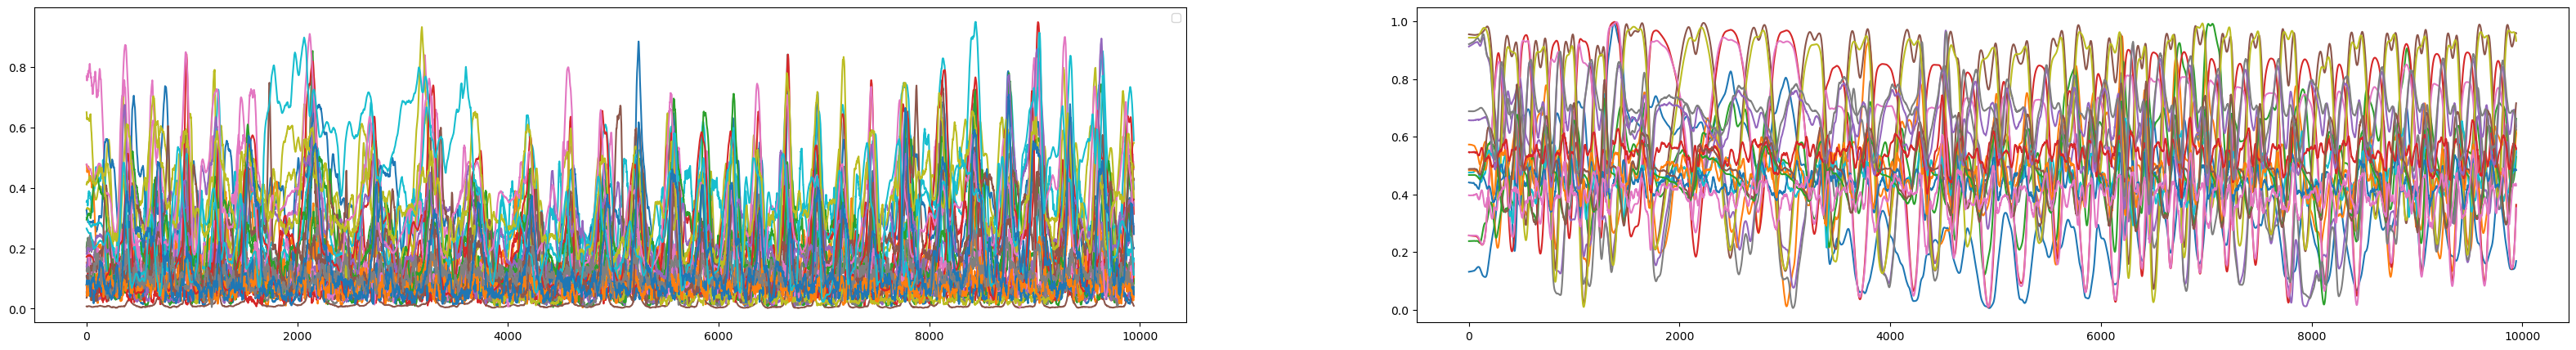

In [3]:

# find zero axis 
data[config.positoin_label_inedx] = data_proses.get_label_axis(data[config.first_positoin_label_inedx],config=config)
# add velocity 
data[config.velocity_label_inedx] = data_proses.calc_velocity(config,data[config.first_positoin_label_inedx])
# subtract bias 
data[config.fmg_index] = data_proses.subtract_bias(data[config.fmg_index+config.sesion_time_stamp])
# fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(40,5))

# ax1.plot(fmg_df[5000:8000])

# ax2.plot(label_df[5000:8000])
# ax1.legend()

# plt.show() 


## normalization 





# TODO: add here agmuntations 



# config.fmg_index =data[config.fmg_index].loc[:,data[config.fmg_index].var(axis=0)>400].columns

# config.input_size = len(config.fmg_index)



#normalize 
data[config.positoin_label_inedx+config.velocity_label_inedx],label_max_val,label_min_val = utils.min_max_normalize(data[config.positoin_label_inedx+config.velocity_label_inedx])
data[config.fmg_index],fmg_max_val,fmg_min_val = utils.min_max_normalize(data[config.fmg_index])


# fmg_df = fmg_df.fillna(0)
#avereg rolling window
data[config.fmg_index] = utils.rollig_window(config=config, data=data[config.fmg_index])
data[config.positoin_label_inedx+config.velocity_label_inedx] = data[config.positoin_label_inedx+config.velocity_label_inedx].rolling(window=config.window_size, axis=0).mean()



data = data.drop_duplicates().dropna().reset_index(drop=True)
fmg_df = data[config.fmg_index]
label_df = data[config.positoin_label_inedx+config.velocity_label_inedx]

fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(40,5))

ax1.plot(fmg_df)

ax2.plot(label_df)
ax1.legend()

plt.pause(0.001) 

In [7]:
featurs = data[config.fmg_index]

In [8]:
featurs

,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,...,S22,S23,S24,S25,S26,S27,S28,S29,S30,S31
0,0.079518,0.152083,0.052941,0.043750,0.055238,0.007460,0.768421,0.104251,0.325490,0.353704,...,0.077083,0.294326,0.171531,0.180741,0.109195,0.477477,0.126316,0.649550,0.265207,0.080556
1,0.079920,0.152083,0.054248,0.043750,0.054286,0.007056,0.761404,0.104474,0.328758,0.355556,...,0.077083,0.297872,0.172246,0.180000,0.109195,0.476577,0.131579,0.644144,0.263747,0.091667
2,0.081124,0.150000,0.052288,0.043750,0.054286,0.006720,0.757895,0.104027,0.331373,0.357407,...,0.075000,0.297872,0.173104,0.181481,0.109195,0.475901,0.129825,0.637838,0.262774,0.091667
3,0.084337,0.150000,0.053595,0.043750,0.055714,0.006720,0.755263,0.103803,0.330719,0.357407,...,0.075000,0.297163,0.173534,0.183704,0.102299,0.475000,0.131579,0.631532,0.261922,0.093056
4,0.086345,0.150000,0.050980,0.068750,0.056667,0.006989,0.755263,0.104474,0.331046,0.357407,...,0.072917,0.298582,0.173677,0.185185,0.101149,0.474324,0.133333,0.626126,0.260706,0.093056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9938,0.201606,0.056250,0.076471,0.043750,0.158571,0.011694,0.484211,0.135570,0.547712,0.138889,...,0.027083,0.365248,0.367239,0.348889,0.432184,0.269820,0.122807,0.390090,0.126277,0.276389
9939,0.200803,0.056250,0.070588,0.047917,0.152857,0.011358,0.479825,0.128188,0.548693,0.146296,...,0.041667,0.361702,0.352933,0.347407,0.424138,0.264640,0.119298,0.390090,0.121411,0.270833
9940,0.202410,0.045833,0.065359,0.054167,0.144286,0.010753,0.474561,0.121253,0.548693,0.151852,...,0.039583,0.360284,0.339485,0.345926,0.424138,0.257883,0.112281,0.381081,0.118491,0.263889
9941,0.201205,0.045833,0.060784,0.054167,0.139524,0.010081,0.464035,0.114765,0.549346,0.161111,...,0.037500,0.360284,0.325608,0.341481,0.424138,0.250225,0.114035,0.374775,0.115328,0.251389


In [9]:
targets = data[config.positoin_label_inedx]
targets['M2x']

,M2x,M2y,M2z,M3x,M3y,M3z,M4x,M4y,M4z
0,0.131466,0.572726,0.237807,0.257335,0.912816,0.955100,0.257414,0.921025,0.943506
1,0.131518,0.572764,0.237815,0.257301,0.913050,0.955073,0.257386,0.921227,0.943499
2,0.131571,0.572797,0.237821,0.257267,0.913252,0.955046,0.257368,0.921418,0.943492
3,0.131628,0.572821,0.237833,0.257233,0.913476,0.955019,0.257345,0.921621,0.943488
4,0.131685,0.572836,0.237843,0.257201,0.913664,0.954978,0.257327,0.921806,0.943484
...,...,...,...,...,...,...,...,...,...
9938,0.158821,0.605649,0.508776,0.321009,0.551886,0.960602,0.311128,0.532570,0.944772
9939,0.161093,0.610044,0.513883,0.331382,0.553729,0.960492,0.321109,0.536011,0.942096
9940,0.163485,0.614465,0.519370,0.342025,0.555465,0.960122,0.331331,0.539344,0.939170
9941,0.166068,0.618665,0.524952,0.352911,0.557085,0.959471,0.341728,0.542465,0.935979


In [29]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
X = featurs
y = targets

selector = SelectKBest(f_regression, k=10)

X_new = selector.fit_transform(X)

TypeError: _BaseFilter.fit() missing 1 required positional argument: 'y'

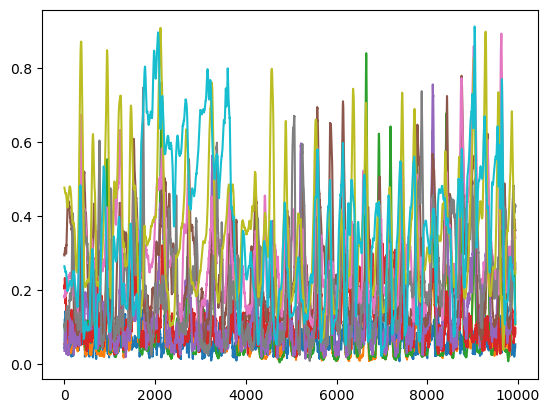

In [22]:
plt.plot(X_new)

TypeError: only size-1 arrays can be converted to Python scalars

True